In [131]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics

In [132]:
data = pd.read_csv("HD_Complete_Data.csv",sep=";")
x = data[['Age',
          'Sexe',
          'ChestPainType',
          'RestingBP',
          'Cholesterol',
          'FastingBS',
          'RestingECG',
          'MaxHR',
          'ExerciseAngina',
          'Oldpeak',
          'ST_Slope']]
x

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [133]:
x = pd.get_dummies(x)
y = data[['HeartDisease']]
x = (x-x.mean())/x.std()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [261]:
# build a model
tf.random.set_seed(1234)
model = Sequential()
model.add(Dense(11, input_shape=(x_train.shape[1],), activation='relu')) # Add an input shape! (features,))
#model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))  
model.summary() 

# compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# now we just update our model fit call
history = model.fit(x_train, y_train,
                    epochs=100, # you can set this to a big number!
                    batch_size=10,
                    validation_data = (x_test, y_test),
                    verbose=1)

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_229 (Dense)           (None, 11)                231       
                                                                 
 dense_230 (Dense)           (None, 1)                 12        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
74/74 [==============================] - 3s 11ms/step - loss: 0.5179 - accuracy: 0.7970 - val_loss: 0.4943 - val_accuracy: 0.7663
Epoch 2/100
74/74 [==============================] - 0s 5ms/step - loss: 0.4191 - accuracy: 0.8474 - val_loss: 0.4306 - val_accuracy: 0.8152
Epoch 3/100
74/74 [==============================] - 0s 5ms/step - loss: 0.3711 - accuracy: 0.8569 - val_loss: 0.4023 - val_accuracy: 0.8261
Epoch 4/100
74/74 [========

Epoch 54/100
74/74 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.9019 - val_loss: 0.3815 - val_accuracy: 0.8207
Epoch 55/100
74/74 [==============================] - 0s 5ms/step - loss: 0.2606 - accuracy: 0.8978 - val_loss: 0.3832 - val_accuracy: 0.8315
Epoch 56/100
74/74 [==============================] - 0s 5ms/step - loss: 0.2605 - accuracy: 0.9019 - val_loss: 0.3815 - val_accuracy: 0.8261
Epoch 57/100
74/74 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.9033 - val_loss: 0.3816 - val_accuracy: 0.8261
Epoch 58/100
74/74 [==============================] - 0s 5ms/step - loss: 0.2593 - accuracy: 0.9101 - val_loss: 0.3826 - val_accuracy: 0.8207
Epoch 59/100
74/74 [==============================] - 0s 5ms/step - loss: 0.2592 - accuracy: 0.9019 - val_loss: 0.3831 - val_accuracy: 0.8207
Epoch 60/100
74/74 [==============================] - 0s 5ms/step - loss: 0.2591 - accuracy: 0.9046 - val_loss: 0.3836 - val_accuracy: 0.8207
Epoch 

In [262]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.4007747769355774
Test accuracy : 0.83152174949646


Text(0.5, 1.0, 'Justesse')

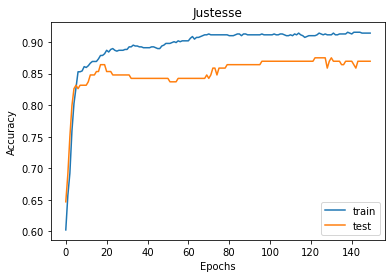

In [246]:
plt.plot(history.history['accuracy'], label = "train")
plt.plot(history.history['val_accuracy'], label = "test")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title("Justesse")

Text(0.5, 1.0, 'Perte')

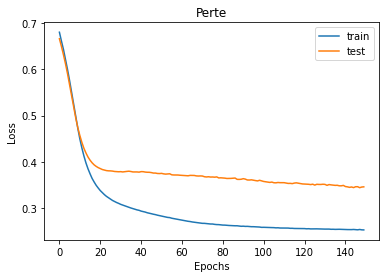

In [247]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("Perte")

In [260]:
model.predict(x_test) # prob of Heart Disease
preds = np.round(model.predict(x_test),0) # 1 and 0 (survival or not)
y_test # 1 and 0 (Heart Disease or not)
cm = confusion_matrix(y_test, preds)
sen = cm[0,0]/(cm[0,0]+cm[1,0])
spe = cm[1,1]/(cm[1,1]+cm[0,1])
print("Matrice de confusion :\n",cm) # order matters! (actual, predicted)
print("Sensitivité :",sen)
print("Spécificité :",spe)


Matrice de confusion :
 [[65 16]
 [ 8 95]]
Sensitivité : 0.8904109589041096
Spécificité : 0.8558558558558559


In [248]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        81
           1       0.86      0.92      0.89       103

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



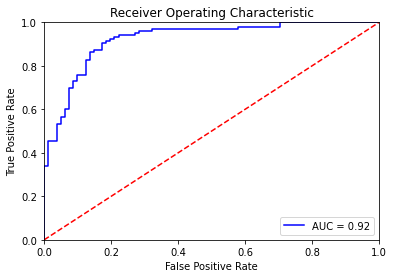

In [249]:
probs = model.predict(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [225]:
probs

array([[0.9903718 ],
       [0.04311457],
       [0.06062832],
       [0.98994756],
       [0.05106103],
       [0.04155213],
       [0.8108687 ],
       [0.53878397],
       [0.97718596],
       [0.9868252 ],
       [0.985183  ],
       [0.04606095],
       [0.031672  ],
       [0.9663471 ],
       [0.16142416],
       [0.9887488 ],
       [0.04585555],
       [0.29078245],
       [0.05018395],
       [0.98128045],
       [0.9740974 ],
       [0.04116121],
       [0.7709353 ],
       [0.06220096],
       [0.98816335],
       [0.0490635 ],
       [0.08155909],
       [0.03102598],
       [0.9859655 ],
       [0.03121427],
       [0.95611495],
       [0.9339243 ],
       [0.88769305],
       [0.03043833],
       [0.04407299],
       [0.990335  ],
       [0.067494  ],
       [0.9884583 ],
       [0.9416046 ],
       [0.9066564 ],
       [0.03175443],
       [0.04234076],
       [0.9834652 ],
       [0.91416144],
       [0.987585  ],
       [0.86572874],
       [0.03931168],
       [0.045